In [ ]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

import torchvision.datasets

In [ ]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
X_train = MNIST_train.data
y_train = MNIST_train.targets
X_test = MNIST_test.data
y_test = MNIST_test.targets

In [ ]:
len(y_train), len(y_test)

(60000, 10000)

In [ ]:
X_train.size()

torch.Size([60000, 28, 28])

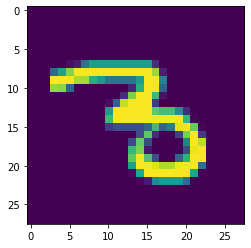

tensor(3)


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[30, :, :])
plt.show()
print(y_train[30])

In [ ]:
X_train[30, :, :]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

Первое отличие заключается в том, что, в отличие от полносвязанной сети, которая видела картинку как один вектор длинный, мы хотим в конволюционную сеть передавать картинку как трёхмерный тензор. Первый канал -- это глубина картинки, в черно-белой картинке это 1 канал с яркостью серого пикселя. А в RGB картинке будут RGB каналы. Соответственно, мы должны нашу картинку, которая на вход пришла (она просто "28 на 28"), разжать до "1 на 28 на 28". Вот мы это и делаем -- мы делаем X_train.unsqueeze, а здесь ставим индекс: "а в каком же измерении мы хотим разжать". То есть X_train у нас -- тензор из 60 000 картинок 28 на 28, а мы хотим чтобы было 60 000 на 1 на 28 на 28, и то же самое мы делаем с тестом.

In [ ]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [ ]:
X_train.shape

torch.Size([60000, 1, 28, 28])

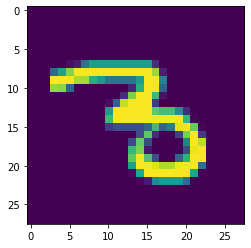

tensor(3)


In [ ]:
plt.imshow(X_train[30, 0, :, :])
plt.show()
print(y_train[30])

In [ ]:
X_train[30, 0, :, :].size()

torch.Size([28, 28])

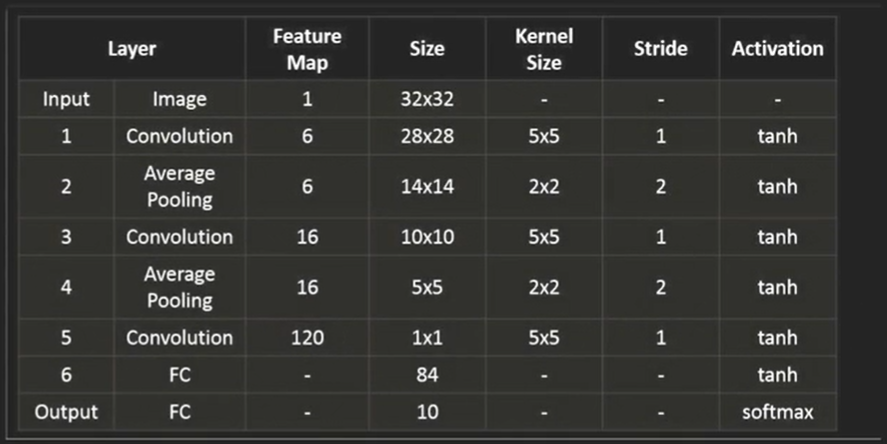

In [ ]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=64, kernel_size=5, padding=0)
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(5 * 5 * 64, 120)
        self.act3  = torch.nn.Tanh()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.Tanh()
        
        self.fc3   = torch.nn.Linear(84, 10)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
lenet5 = LeNet5()

In [ ]:
import gc

gc.collect()

!nvidia-smi

Thu Sep  9 08:34:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    60W / 149W |   3995MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [ ]:
batch_size = 1024

test_accuracy_history = []
test_loss_history = []
# train_accuracy_history = []
X_test = X_test.to(device)
y_test = y_test.to(device)
# X_train = X_train.to(device)
# y_train = y_train.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet5.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = lenet5.forward(X_test)

    # train_preds = lenet5.forward(X_train)

    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    
    test_accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)
    # train_accuracy = (train_preds.argmax(dim=1) == y_train).float().mean().data.cpu()
    # train_accuracy_history.append(train_accuracy)

    print(f'{epoch}: {test_accuracy.data}')
    # if test_loss_history[epoch] > test_loss_history[epoch - 1]:
    #   print('maybe overfit')

0: 0.968999981880188
1: 0.9845999479293823
2: 0.9870999455451965
3: 0.9879999756813049
4: 0.9900999665260315
5: 0.9909999966621399
6: 0.9904999732971191
7: 0.9910999536514282
8: 0.9910999536514282
9: 0.9917999505996704
10: 0.9921000003814697
11: 0.9923999905586243
12: 0.9921000003814697
13: 0.9926999807357788
14: 0.9930999875068665
15: 0.9921999573707581
16: 0.9923999905586243
17: 0.9921000003814697
18: 0.9926999807357788
19: 0.9921000003814697
20: 0.9921999573707581
21: 0.9921999573707581
22: 0.9923999905586243
23: 0.9927999973297119
24: 0.9926999807357788
25: 0.9924999475479126
26: 0.9924999475479126
27: 0.9923999905586243
28: 0.9922999739646912
29: 0.9922999739646912
30: 0.9923999905586243
31: 0.9925999641418457
32: 0.9926999807357788
33: 0.9925999641418457
34: 0.9925999641418457
35: 0.9927999973297119
36: 0.9923999905586243
37: 0.9925999641418457
38: 0.9925999641418457
39: 0.9925999641418457
40: 0.9925999641418457
41: 0.9925999641418457
42: 0.9926999807357788
43: 0.9925999641418457

KeyboardInterrupt: ignored

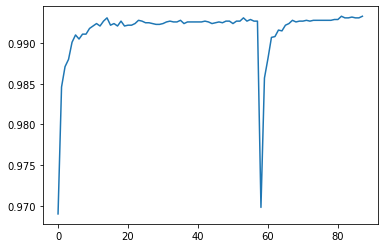

In [ ]:
plt.plot(test_accuracy_history);
# plt.plot(train_accuracy_history);
# plt.plot(test_loss_history);

In [ ]:
torch.save(lenet5, 'model')

In [ ]:
lenet5 = torch.load('model')
lenet5.eval()

LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (act1): ReLU()
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 64, kernel_size=(5, 5), stride=(1, 1))
  (act2): ReLU()
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=1600, out_features=120, bias=True)
  (act3): Tanh()
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (act4): Tanh()
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

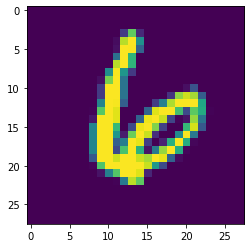

tensor(6) tensor(6)


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:490: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


In [ ]:
num = np.random.randint(0, 10001)
plt.imshow(X_test[num, 0, :, :].cpu())
plt.show()
print(lenet5.forward(X_test[num, 0, :, :].data.resize(1, 1, 28, 28)).cpu().argmax(), y_test[num].cpu().data)